In [1]:
root = '/home/bzr0014/Additive/'

In [2]:
!ls {root}files

April26_AMboneA1_volume_abs.h5	       low_transformed.np
April26_AMboneA1_volume_absorption.h5  mardas.model
April26_AMboneA1_volume_darkfield.h5   model20200216.keras
April27_AMA2_volume_abs.h5	       model20200225.keras
April27_AMA2_volume_darkfield.h5       model20200226_2.keras
high_3d.np			       model20200226_3.keras
high_transformed.np		       model20200226.keras
low_3d_dark.np			       resize.py
low_3d.np			       to_use_in_ml.np
low_transformed_dark.np


In [4]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
import h5py
from joblib import load, dump
from sklearn.cluster import KMeans
from dask.distributed import LocalCluster, Client
from additive2 import utility
from additive2.config import *

ModuleNotFoundError: No module named 'utility'

In [2]:
cluster = LocalCluster(n_workers=6, threads_per_worker=1)
client = Client(cluster)

In [3]:
client

<Client: 'tcp://127.0.0.1:38037' processes=6 threads=6, memory=21.00 GB>

In [5]:
low_transformed = load('files/low_transformed.np')
high_transformed = load('files/high_transformed.np')

In [3]:
low_transformed.shape

(158, 162, 166)

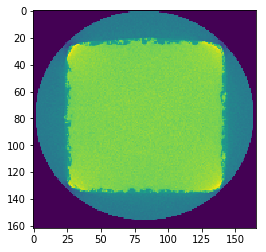

In [4]:
plt.imshow(high_transformed[10])

In [6]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

In [7]:
def get_clusters(x, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, n_jobs=1)
    model.fit(x.reshape(-1, 1))
    return model.predict(x.reshape(-1, 1)).reshape(*x.shape)

In [8]:
#client.close()
#cluster.close()
#cluster = LocalCluster(n_workers=6, threads_per_worker=1)
#client = Client(cluster)
np.prod

<function numpy.core.fromnumeric.prod(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)>

In [9]:
def share_btw_processes(x, dtype):
    size = np.produ

In [10]:
#for i in range(len(high_transformed)):
#from dask import delayed, compute
ananas = []
for i in range(len(high_transformed)):
    clusters = get_clusters(high_transformed[i], 3)
    x = high_transformed[i] * (clusters == clusters[tuple(x//2 for x in clusters.shape)])
    t = (normalize(x)>0) *  (normalize(low_transformed[i])>0.2)
    gi = normalize(normalize(low_transformed[i]) + t)
    ananas.append( gi)
ananas = np.array(ananas)

/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


0

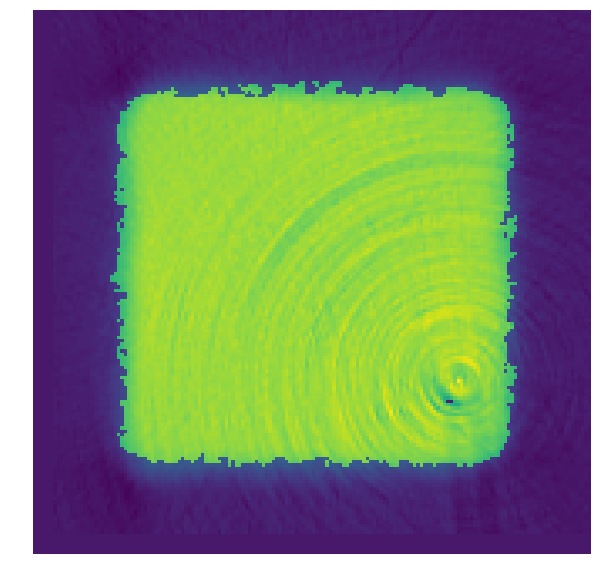

In [326]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.axis('off')
plt.imshow(gi)
plt.savefig('images/low_res_cleaned.png', dpi=300)

In [131]:
h5name = H5NAMES[0]
darkfield = np.array(h5py.File('files/%s_darkfield.h5'%h5name)['darkfield'])
absorption = np.array(h5py.File('files/%s_abs.h5'%h5name)['absorption'])

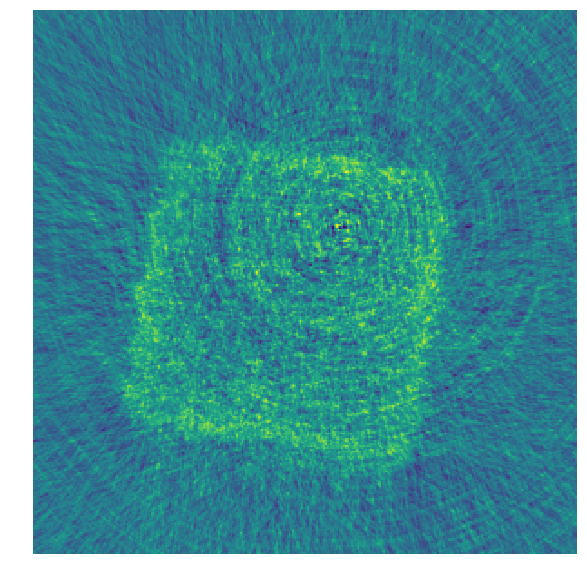

In [151]:
plt.imshow(darkfield[10, 200:500, 150:450])
plt.axis('off')
plt.savefig('images/darkfield.png', dpi=300)

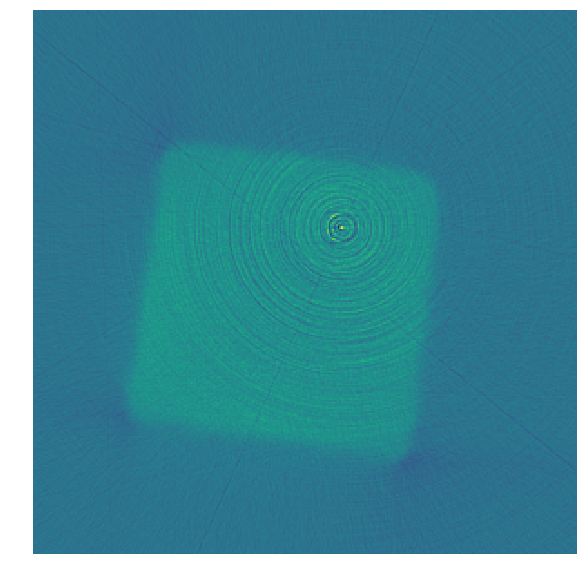

In [150]:
plt.imshow(absorption[10, 200:500, 150:450])
plt.axis('off')
plt.savefig('images/absorption.png', dpi=300)

In [5]:
high_3d = load('files/high_3d.np')

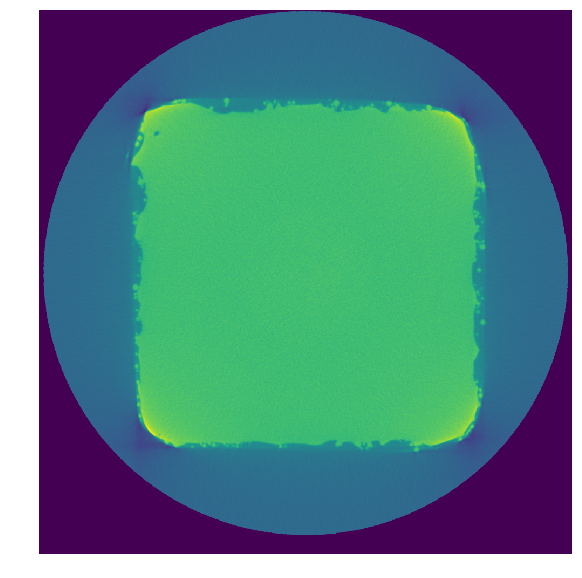

In [164]:
plt.imshow(high_3d[570])

plt.axis('off')
plt.savefig('images/high.png', dpi=300)

In [159]:
cv2.imwrite("images/high.png", high_3d[570])

True

In [160]:
%%bash
du -hs images/*

276K	images/absorption.png
372K	images/darkfield.png
304K	images/high.png
112K	images/low_res_cleaned.png


In [165]:
from multiprocessing import Pool

In [166]:
Pool?

In [172]:
absorption.shape

(250, 640, 640)

In [483]:
#a = darkfield/(absorption+.1)
a = absorption/(darkfield+.01)

In [484]:
a = np.where(~np.isnan(a), a, 0)

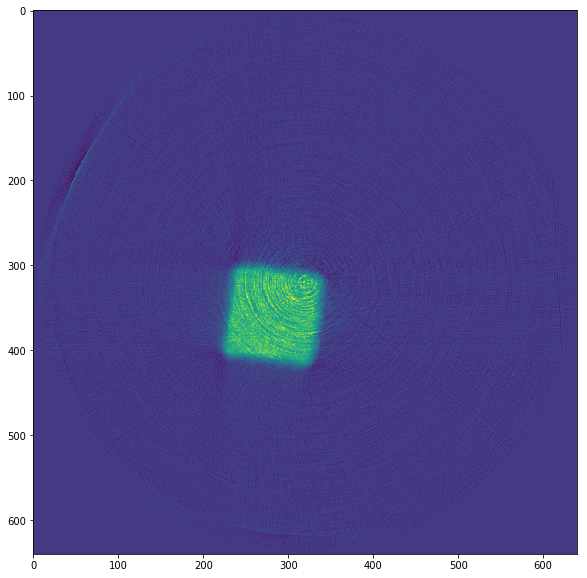

In [485]:
plt.imshow(a[100])

In [192]:
darkfield.min()

-0.007971958257257938

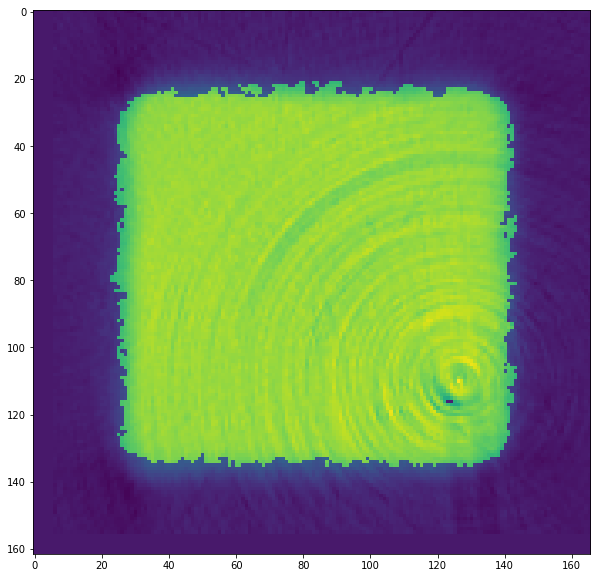

In [196]:
plt.imshow(normalize(normalize(low_transformed[10]) + t))

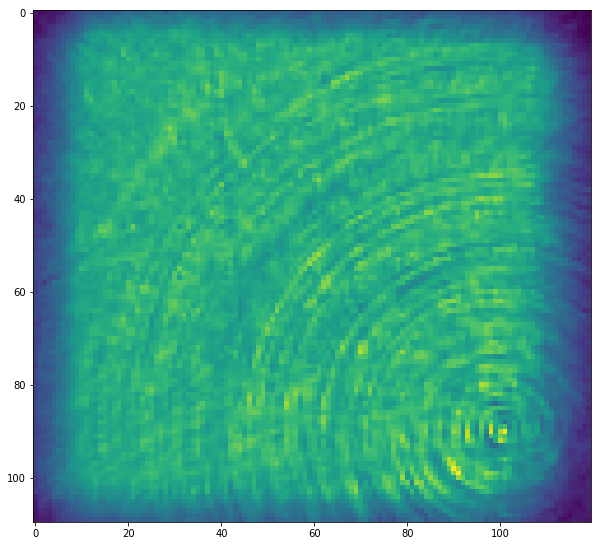

In [584]:
import cv2
#x = (normalize(low_transformed[10])*255).astype('uint8')[19:142,23:144]
x = rotate_image((normalize(a[150])*255).astype('uint8'), -84)[230:340, 220:340]
#x = cv2.medianBlur(x, 15)
plt.imshow(x)

In [585]:
from sklearn.cluster import KMeans

In [586]:
model = KMeans(5, n_jobs=6)
model.fit(x.reshape(-1, 1))
res = model.predict(x.reshape(-1, 1)).reshape(*x.shape)

In [587]:
h, w = x.shape
xv, yv = np.meshgrid(range(h), range(w), sparse=False, indexing='ij')

In [588]:
indices = np.array([(i,j) for i in range(h) for j in range(w)])
#val = np.concatenate([indices, cv2.GaussianBlur(x, (3, 3),1).reshape(-1, 1)], axis=1)
val = np.concatenate([indices, cv2.medianBlur(x, 3).reshape(-1, 1)], axis=1)

In [589]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
val = scaler.fit_transform(val)

val[:, 2] *= 5

/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [590]:
val

array([[0.        , 0.        , 0.31746032],
       [0.        , 0.00840336, 0.31746032],
       [0.        , 0.01680672, 0.31746032],
       ...,
       [1.        , 0.98319328, 0.3968254 ],
       [1.        , 0.99159664, 0.3968254 ],
       [1.        , 1.        , 0.34391534]])

In [601]:
model = KMeans(3, n_jobs=6)
model.fit(val)
res = model.predict(val)#.reshape(*x.shape)
res

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [602]:
res = res.reshape(*x.shape)

In [603]:
bins = np.argsort(np.bincount(res.reshape(-1)))
bins

array([1, 0, 2])

In [89]:
def rotate_image(img, angle):
    #get center
    center = tuple(x//2 for x in img.shape)
    # get row and col num in img
    height, width = img.shape[0], img.shape[1]
    # calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1)
    # rotate the original image
    img_rot = cv2.warpAffine(img, M, (width, height))
    # now rotated rectangle becomes vertical and we crop it
    return img_rot

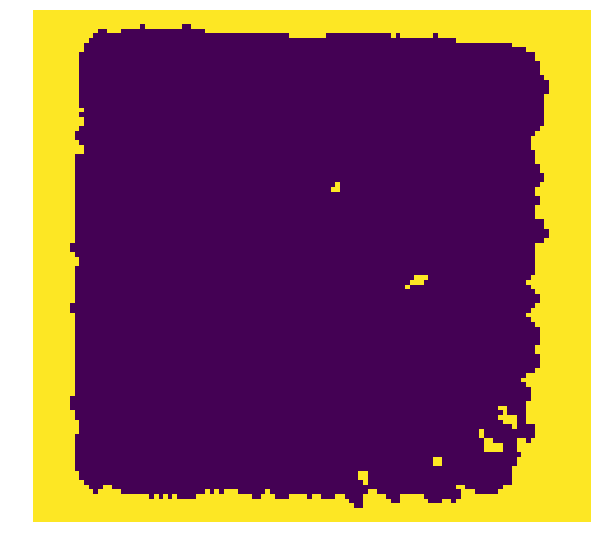

In [633]:
abbas = (res!=bins[-1]).astype('uint8')
#abbas = rotate_image(abbas, -80)
plt.imshow(abbas)
plt.axis('off')
plt.savefig('images/cleaned_and_clusterd.png', dpi=150)

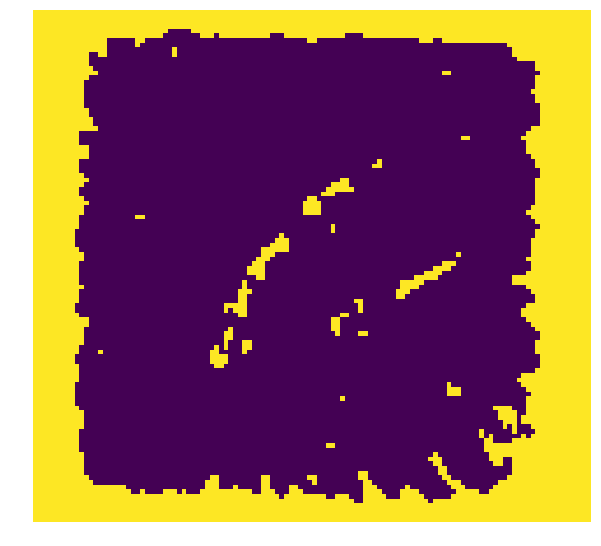

In [635]:
plt.imshow(cv2.medianBlur(x, 3)<150)

plt.axis('off')
plt.savefig('images/before_cleaning.png', dpi=150)

In [325]:
bins = np.bincount(res.reshape(-1))
print(bins)
index = np.argsort(bins)[1]

[ 9283  2619  1757 10619  2614]


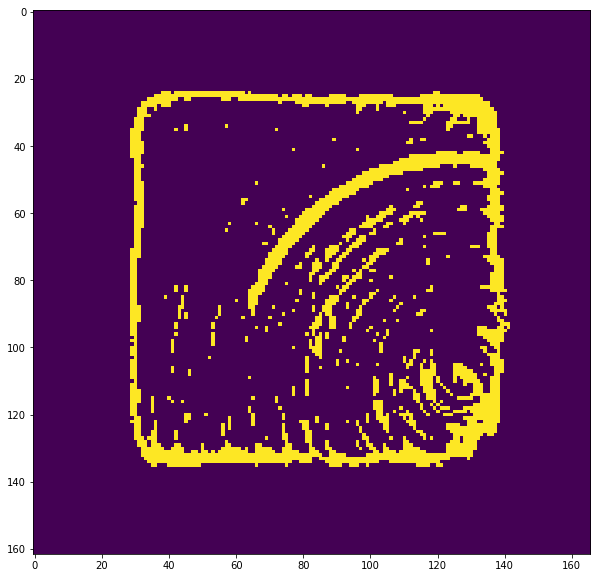

In [326]:
mask = res==index
plt.imshow(mask)

In [327]:
cv2.HoughCircles((res==index).astype('uint8'), cv2.HOUGH_GRADIENT, 1,20, 
                 param1=10,param2=50,minRadius=0,maxRadius=0)

In [328]:
kernel = np.ones((3,3))
blurred = cv2.medianBlur(x, 3)

In [331]:
x = (normalize(low_transformed[10])*255).astype('uint8')
x[mask] = blurred[mask]

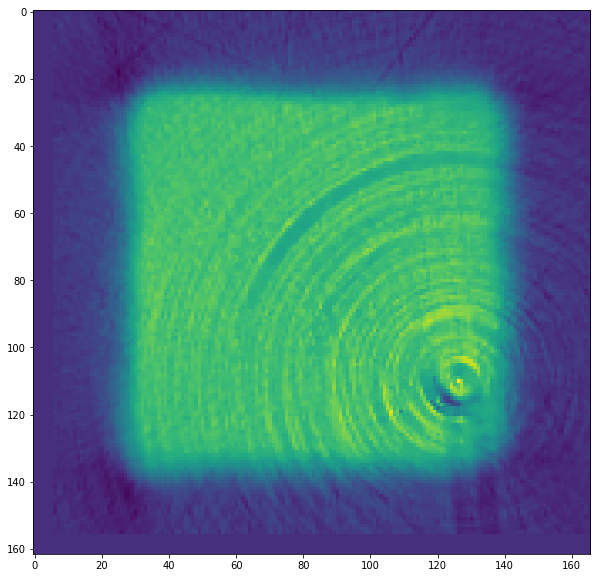

In [332]:
plt.imshow(x)

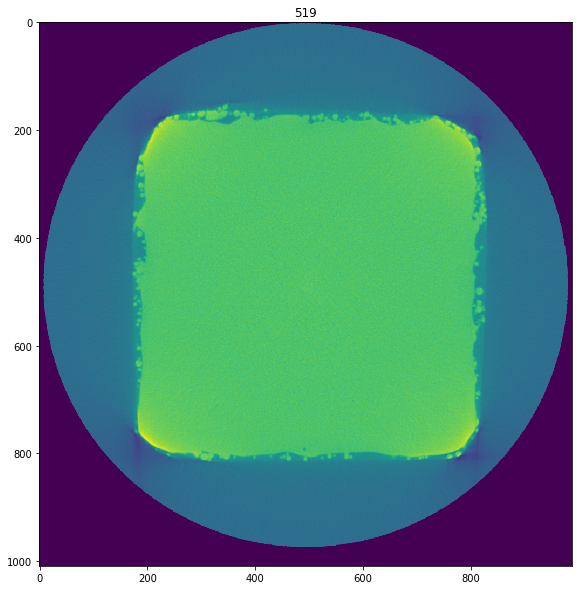

In [641]:
from IPython.display import clear_output
for i, img in enumerate(high_3d[500:520], 500):
    plt.imshow(img)
    plt.title(i)
    plt.show()
    clear_output(True)

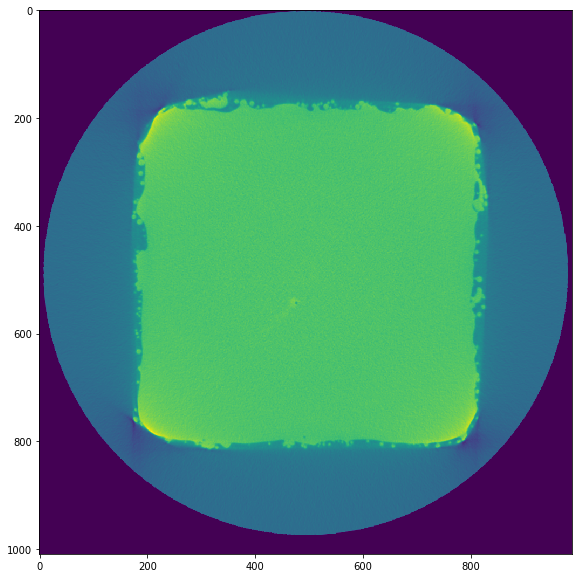

In [846]:
plt.imshow(hx[200:800, 200:800])
x = 30
hx = (high_3d[515])#,220+x:780-x, 220+x:780-x], (11,11), 1)
plt.imshow(hx)

In [847]:
model = KMeans(n_clusters=3, n_jobs=6)
model.fit(hx.reshape(-1, 1))
hres = model.predict(hx.reshape(-1, 1)).reshape(*hx.shape)
#model2 = KMeans(n_clusters=3, n_jobs=6)
#model2.fit(hx.reshape(-1, 1))
#bulk = model2.predict(hx.reshape(-1, 1)).reshape(*hx.shape)
#buld = bulk == bulk[tuple(x//2 for x in bulk.shape)]

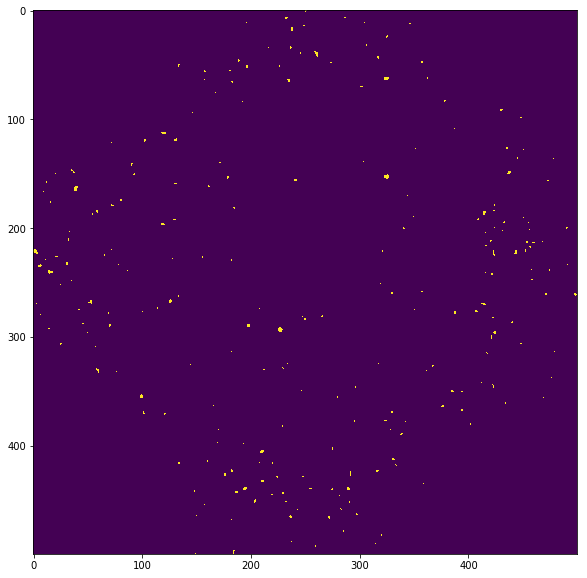

In [832]:
plt.imshow(hx < np.percentile(hx, 1))

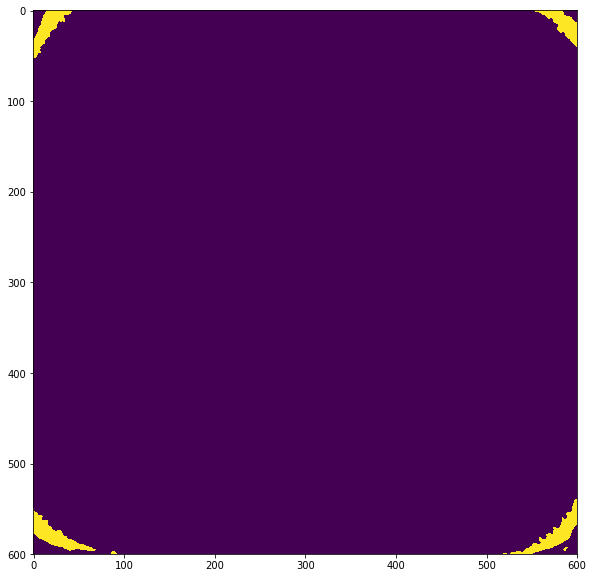

In [755]:
ls = normalize(hx)
plt.imshow((ls > .8)*hres)

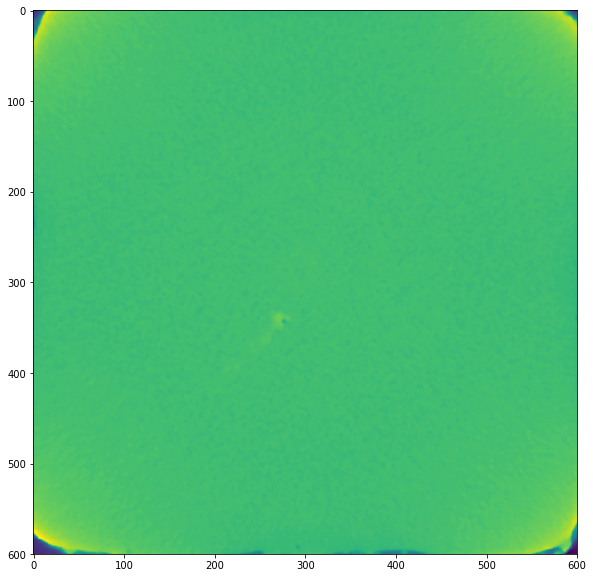

In [723]:
plt.imshow(hx[200:800, 200:800])

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
import h5py
from joblib import load, dump
from sklearn.cluster import KMeans
from dask.distributed import LocalCluster, Client
import utility
from config import *

In [2]:
cluster = LocalCluster(n_workers=6, threads_per_worker=1)
client = Client(cluster)

In [3]:
client

<Client: 'tcp://127.0.0.1:46385' processes=6 threads=6, memory=21.00 GB>

In [4]:
def get_pores_high(img):
    upper_thresh = .6666
    lower_thresh = .43478
    mn, mx = np.min(img), np.max(img)
    r = mx-mn
    img = (img-mn)/r
    thresh = (img < upper_thresh) \
             * (img > lower_thresh) \
             * np.ones((img.shape), dtype='uint8')
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(51,51))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    return thresh, contours
#print "min = %4.2f ; max = %4.2f"%(np.min(thresh), np.max(thresh))
#print "number larger than zero: %d"%(np.sum(thresh >= 1))
#print "min = ", np.min(img)
#print "max = ", np.max(img)

In [5]:
from functools import reduce
shape = load('files/high_3d.np').shape
size = reduce(lambda x,y: x*y, shape)

In [6]:
import ctypes
from multiprocessing import Array
High_3d = Array(ctypes.c_int8, size, lock=False)

In [7]:
high_3d = np.frombuffer(High_3d, dtype=ctypes.c_uint8)

In [8]:
high_3d[:] = load('files/high_3d.np').reshape(-1)

In [9]:
high_3d = high_3d.reshape(*shape)

In [10]:
high_3d.shape

(997, 1009, 988)

In [11]:
#import time
#for i in range(470, 550):
def get_pores(hx):
    thresh, contours = get_pores_high(hx)
    im_t = np.zeros_like(thresh)
    good_contours = [c for c in contours if len(c) < 10]
    im_t = cv2.drawContours(im_t, good_contours, -1, 255, -1)
    return im_t, good_contours
#def get_pores(i):
#    hx = high_3d[i]
#    thresh, contours = get_pores_high(hx)
#    im_t = np.zeros_like(thresh)
#    good_contours = [c for c in contours if len(c) < 10]
#    im_t = cv2.drawContours(im_t, good_contours, -1, 255, -1)
#    return im_t, contours

In [12]:
from dask import delayed, compute

In [13]:
res = [delayed(get_pores)(hx) for hx in (high_3d)]
res = compute(res)[0]

In [14]:
#from multiprocessing import Pool
#with Pool(6) as p:
#    res = p.map(get_pores, (high_3d))

In [15]:
client.restart()

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

In [16]:
def get_neighbors(x, y, z):
    return ((x-i, y-j, z-k) for i in range(0,2) for j in range(0,2) for k in range(0, 2))
nodes = np.array([(*p, z) for z, (_, contours) in enumerate(res) 
        for contour in contours
        for p in np.array(contour).reshape(-1, 2)])

In [17]:
SS = np.sum(nodes**2,axis=1).reshape(-1,1) + np.sum(nodes**2, axis=1).reshape(1, -1)

In [18]:
ASS = SS-2*nodes.dot(nodes.T)

In [19]:
ASS = [np.abs(s.reshape(1, -1)-s.reshape(-1, 1))<=1 for s in nodes.T]

In [20]:
ASS = reduce(lambda x,y:x*y, ASS)

In [21]:
MASS = np.tril(ASS, -1)

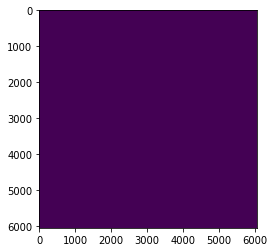

In [22]:
plt.imshow(MASS)

In [26]:
import igraph
g = igraph.Graph()
g.add_vertices(nodes)
g.add_edges(np.array(np.where(MASS)).T)

In [29]:
#dump(g, 'graph.pkl')
#g = load('graph.pkl')

In [30]:
clusters = g.clusters(mode=1)

In [31]:
sorted_clusters = np.argsort([len(cluster.vs) for cluster in clusters.subgraphs()])

In [32]:
pore = np.array([x['name'] for x in clusters.subgraph(sorted_clusters[-1]).vs])

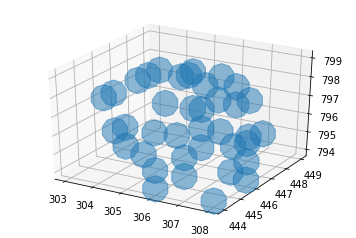

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pore[:, 0], pore[:,1], pore[:,2], s=700, marker=(10, 0, 0), alpha=.5)

In [35]:
from scipy.spatial import ConvexHull

In [36]:
c = ConvexHull(pore)

In [123]:
def plot3Dcontour(pts, ax, alpha=1, color='blue'):
        hull = ConvexHull(pts)
        # printHullCharacteristics(hull)
        for (i1, i2, i3) in hull.simplices:
                p1 = pts[i1]
                p2 = pts[i2]
                p3 = pts[i3]
                x = [p1[0], p2[0] - .01, p3[0] + .01]
                y = [p1[1], p2[1] - .01, p3[1]+.01]
                z = [p1[2], p2[2], p3[2]]
                try:
                    ax.plot_trisurf(x, y, z, linewidth=1, alpha=alpha, color=color)
                except:
                    pass

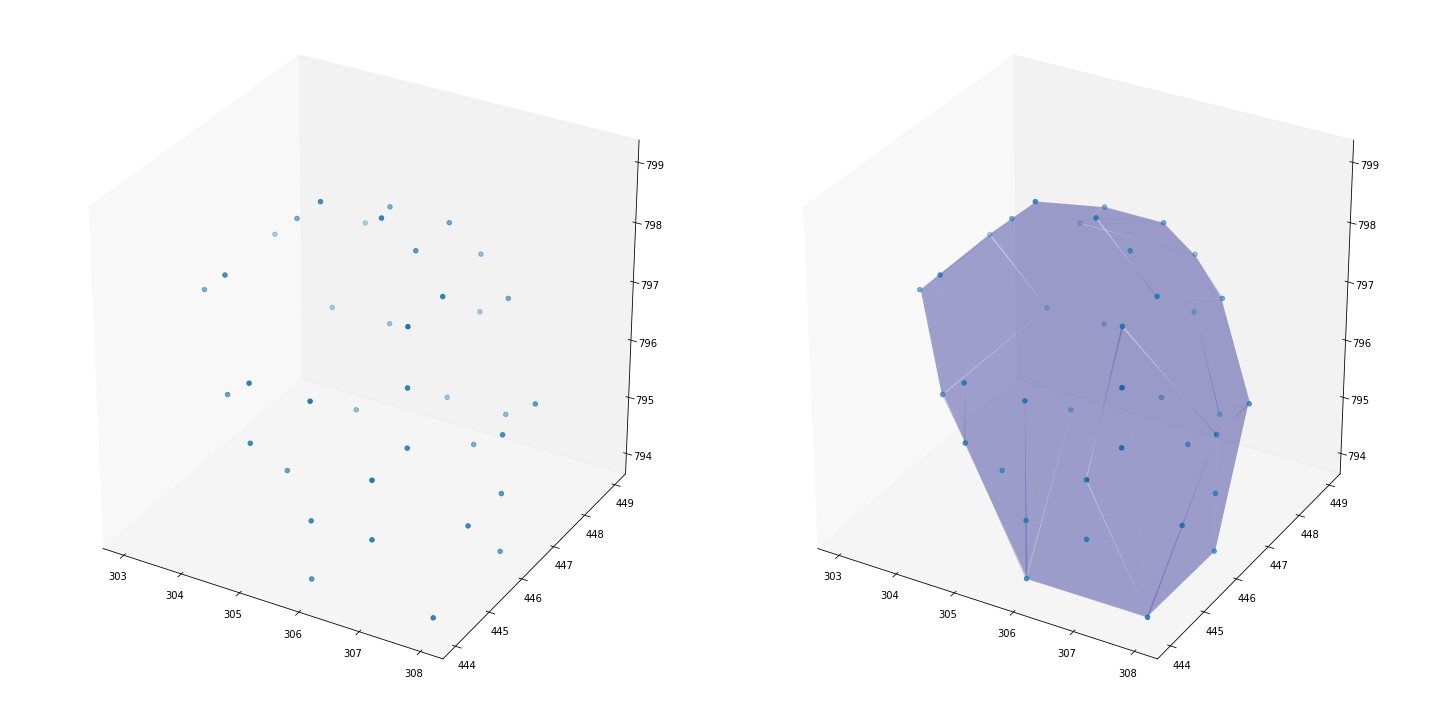

In [159]:
from pylab import rcParams
import plotEllipsoid
rcParams['figure.figsize'] = 20, 10
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.grid(False)
#plot3Dcontour(pore, ax, alpha=.2)
#t = plotEllipsoid.EllipsoidTool()
#ellipsoid = t.getMinVolEllipse(pore)
#t.plotEllipsoid(*ellipsoid, ax)
ax.scatter(pore[:, 0], pore[:,1], pore[:,2])
ax = fig.add_subplot(122, projection='3d')
ax.grid(False)
plot3Dcontour(pore, ax, alpha=.2)
#t = plotEllipsoid.EllipsoidTool()
#ellipsoid = t.getMinVolEllipse(pore)
#t.plotEllipsoid(*ellipsoid, ax)
ax.scatter(pore[:, 0], pore[:,1], pore[:,2])
fig.tight_layout()
plt.savefig('./images/pore_and_convex.png', dpi=150)

In [39]:
pore.shape

(38, 3)

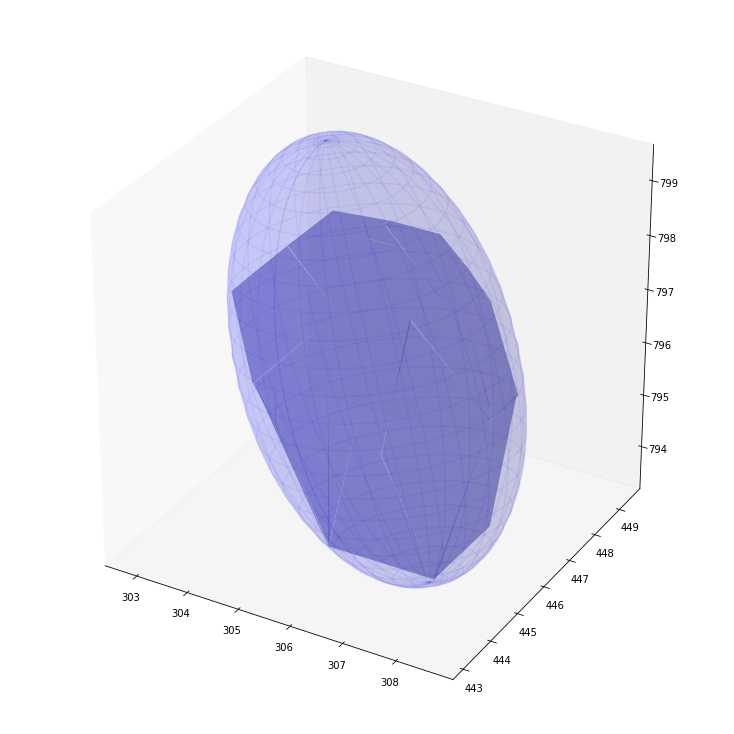

In [216]:
rcParams['figure.figsize'] = 10, 10
def drawEllipsoidVectors(ellipsoid, ax):
        center, radii, evecs = ellipsoid
        v1 = evecs[0] * radii[0]
        v2 = evecs[1] * radii[1]
        v3 = evecs[2] * radii[2]
        # print "v1 length = ", np.sqrt(np.sum(v1 * v1))
        # print "v2 length = ", np.sqrt(np.sum(v2 * v2))
        # print "v3 length = ", np.sqrt(np.sum(v3 * v3))
        ax.plot([center[0], center[0] + v1[0]], [center[1], center[1] + v1[1]], [center[2], center[2] + v1[2]], color='b')
        ax.plot([center[0], center[0] + v2[0]], [center[1], center[1] + v2[1]], [center[2], center[2] + v2[2]], color='b')
        ax.plot([center[0], center[0] + v3[0]], [center[1], center[1] + v3[1]], [center[2], center[2] + v3[2]], color='b')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t = plotEllipsoid.EllipsoidTool()
ellipsoid = t.getMinVolEllipse(pore)
ax.grid(False)
#t.plotEllipsoid(*ellipsoid, ax)
t.plotEllipsoid(*ellipsoid, ax, plotAxes=False, plotWire=True, wireAlpha=.05, cageAlpha=.1)
plot3Dcontour(pore, ax, alpha=.2)
#drawEllipsoidVectors(ellipsoid, ax)
fig.tight_layout(pad=0, w_pad=.1, h_pad=.1)
plt.savefig('images/single_ellipsoid.png', dpi=150)

In [114]:
subgraphs = clusters.subgraphs()
#largest = [subgraphs[i] for i in sorted_clusters[-2:]]
largest = [subgraphs[i] for i in sorted_clusters[-4:]]

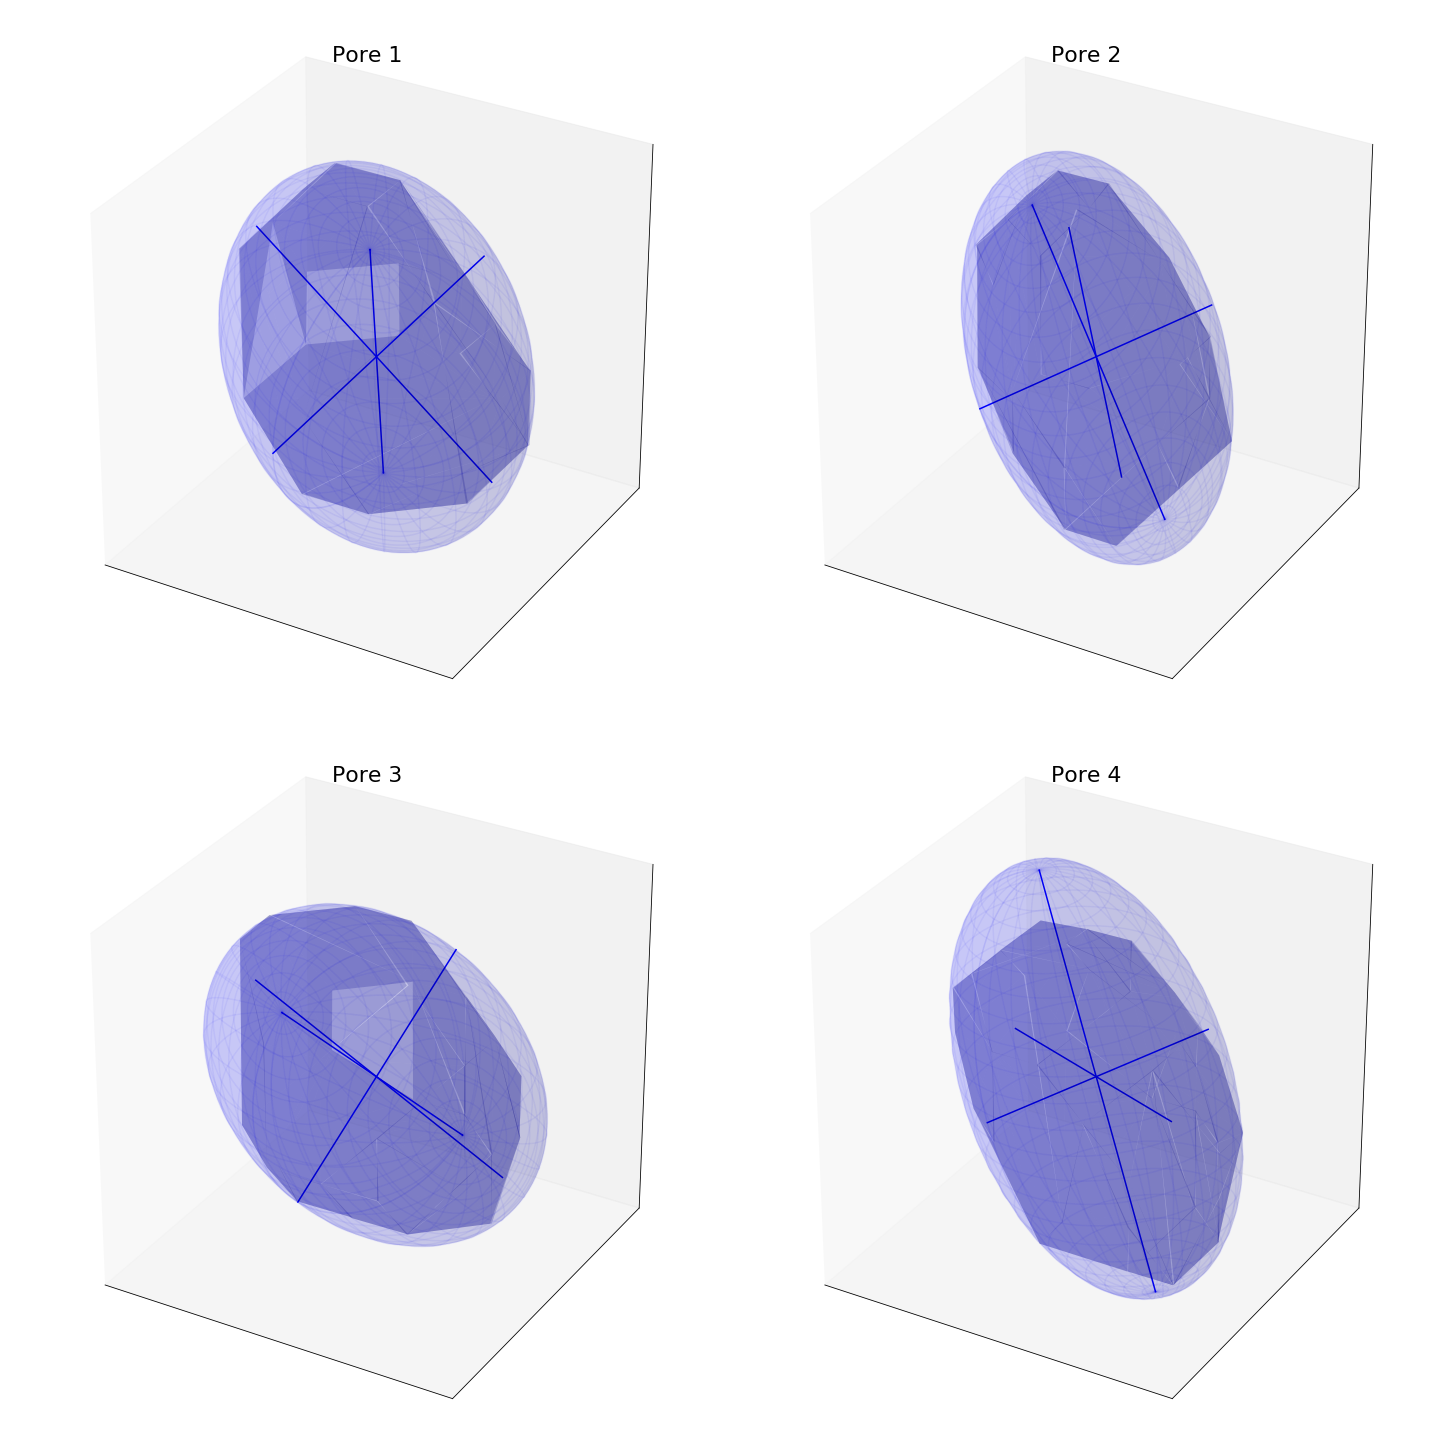

In [161]:
rcParams['figure.figsize'] = 20, 20
#ax.set_xlim([200, 400])
#ax.set_ylim([600, 700])
#ax.grid(False)
#ax.set_xticks([])
#ax.set_zticks([])
#ax.set_yticks([])
#ax.set_zlim([95, 105])
def plot(subgraph, ax):
    pore = np.array([x['name'] for x in subgraph.vs])#.transpose(1,2,0)
    #if len(pore) < 5: return
    pore = np.concatenate([pore, pore + [1,0,0] + np.random.rand(*pore.shape)*.01, pore+[0,1,0], pore+[0,0,1]])
    #print(len(pore))
    #print(pore)
    #ax.scatter(pore[:,0], pore[:,1], pore[:,2], alpha=1, s=1, color='b')
    ellipsoid = t.getMinVolEllipse(pore)
    t.plotEllipsoid(*ellipsoid, ax, plotAxes=True, plotWire=True, wireAlpha=.05, cageAlpha=.1)
    plot3Dcontour(pore, ax, alpha=.2)
fig = plt.figure()
for i in range(4):
    index = int('22%d'%(i+1))
    ax = fig.add_subplot(index, projection='3d')   
    ax.set_xticks([])
    ax.set_zticks([])
    ax.set_yticks([])   
    ax.set_title("Pore %d"%(i+1), size=22)
    plot(largest[i], ax)
fig.tight_layout(pad=0.05, w_pad=0.05, h_pad=.1)
plt.savefig('images/four_pores.png', dpi=150)

In [3]:
w, h, d = thresh.shape

def get_neighbors(index):
    i, j, k = index
    return [(i+t, j+s, k+q) for t in range(0, 2)
                             for s in range(0, 2)
                             for q in range(0, 2)
            if thresh[i,j,k]*thresh[i+t, j+s, k+q]]
indices = ((i, j, k) for i in range(w) for j in range(h-1) for k in range(d-1))

In [ ]:
from multiprocessing import Pool
with Pool(7) as p:
    mardas = p.map(get_neighbors, indices)

In [117]:
mardas = mardas.compute()

In [38]:
model = MeanShift(n_jobs=6)

In [3]:
import ctypes
from multiprocessing import Array, Pool
n, c = load('points.np').shape
points = np.frombuffer(Array(ctypes.c_int16, n*c, lock=False), dtype=ctypes.c_int16)
points[:] = load('points.np')

In [7]:
points = points.reshape(-1, 3)

In [4]:
def get_neighbors(i):
    return np.where(np.prod(np.abs(points-points[0]), axis=1) == 1)

In [8]:
from multiprocessing import Pool
with Pool(6) as p:
    res = p.map(get_neighbors, range(len(points)))

Process ForkPoolWorker-10:
Process ForkPoolWorker-8:
Process ForkPoolWorker-11:
Traceback (most recent call last):
Process ForkPoolWorker-12:
Traceback (most recent call last):
  File "/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-7:
  File "/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/bzr0014/anaconda3/envs/tensorCpu/lib/python3.6/multiprocessin

KeyboardInterrupt: 

In [39]:
points.shape

(3, 1035943)

In [24]:
linked

array([[7.30000000e+01, 7.40000000e+01, 1.00000000e+00, 2.00000000e+00],
       [7.20000000e+01, 1.00000000e+03, 1.00000000e+00, 3.00000000e+00],
       [7.10000000e+01, 1.00100000e+03, 1.00000000e+00, 4.00000000e+00],
       ...,
       [5.00000000e+00, 1.99200000e+03, 3.37890515e+02, 3.00000000e+00],
       [8.00000000e+00, 1.99500000e+03, 3.69970269e+02, 9.97000000e+02],
       [1.99600000e+03, 1.99700000e+03, 3.71810436e+02, 1.00000000e+03]])

In [28]:
points.T.dot(points)

MemoryError: 

In [186]:
img = cv2.imread('images/high_res_thresholded.png', 0)

In [188]:
values = np.where(np.bincount(img.reshape(-1)))[0]
values

array([ 30, 255])

(array([0, 0]), array([ 30, 255]))

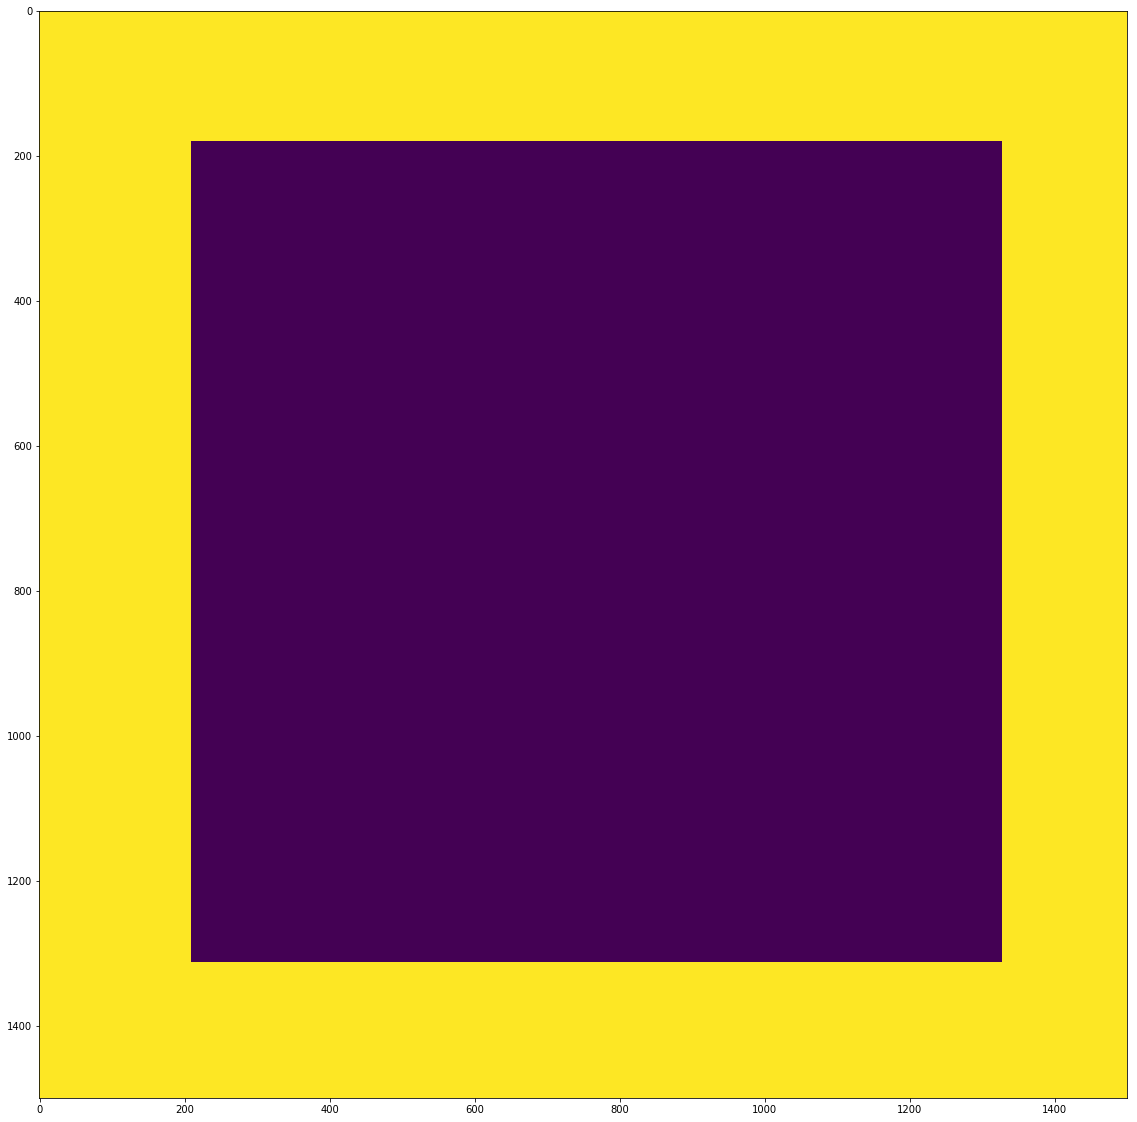

In [192]:
plt.imshow(img==values[1])

In [197]:
thresh = np.array([r[0] for r in res])

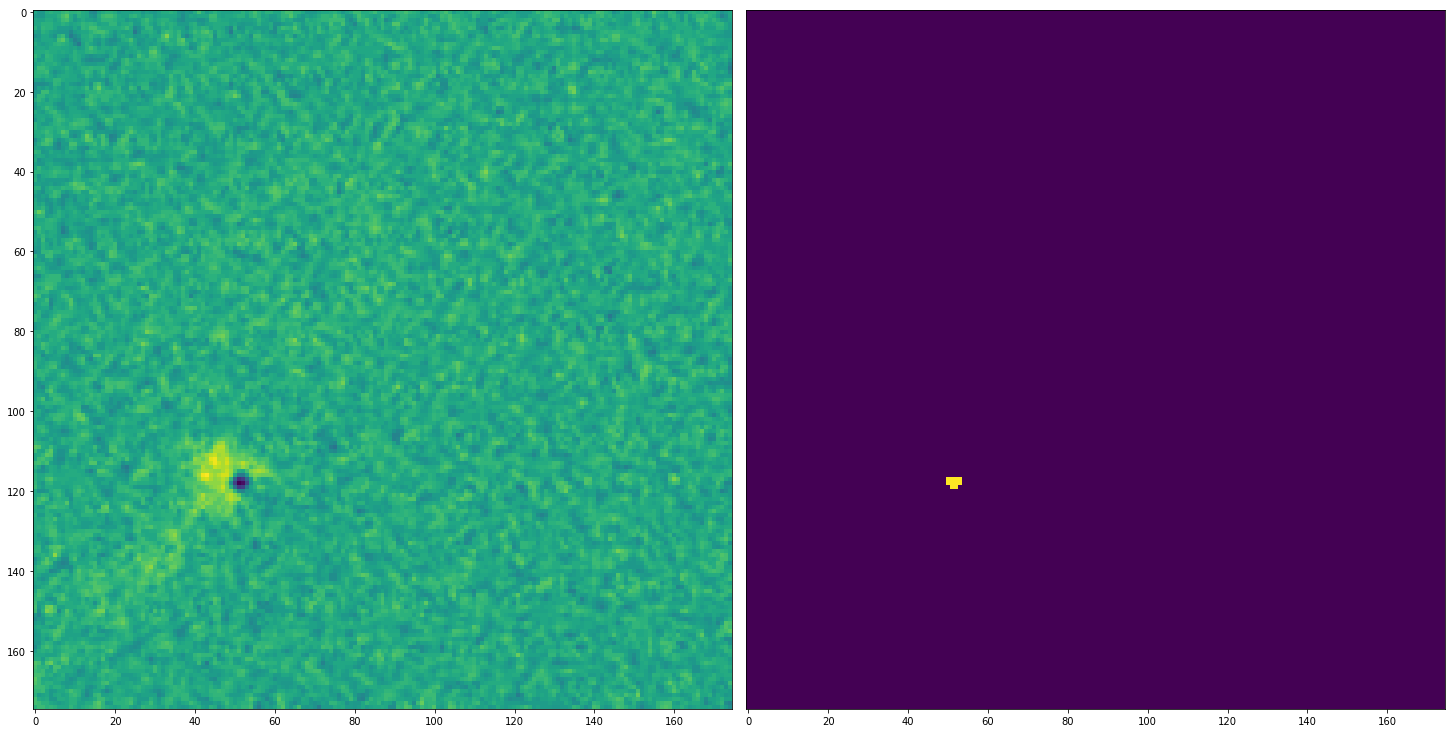

In [214]:
rcParams['figure.figsize'] = 20, 10
ax = plt.subplot(121)
plt.tight_layout(pad=0, h_pad=.1, w_pad=.1)
s = (slice(425, 600), slice(425, 600))
ax.imshow(high_3d[515][s])
ax = plt.subplot(122)
ax.set_yticks([])
ax.imshow(thresh[515][s])
plt.savefig('images/high_res_mardas2.png')

In [303]:
(thresh[515][s]>0).sum()

10

In [217]:
(4**3)/(2.9**3)

2.624133830825372

In [278]:
zapas = load('files/high_transformed.np')
lapas = load('files/low_transformed.np')

In [257]:
nanaz = zapas[92][60:80,80:120]
nanaz.min()

130

In [277]:
#nanaz = zapas[100]
for i, nanaz in enumerate(zapas):
    ax = plt.subplot(121)
    ax.imshow(nanaz)
    ax = plt.subplot(122)
    ax.imshow((nanaz>120)&(nanaz<141))
    plt.title(i)
    plt.show()
    clear_output(True)
    time.sleep(.1)

KeyboardInterrupt: 

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [260]:
zapas[92].max()

209

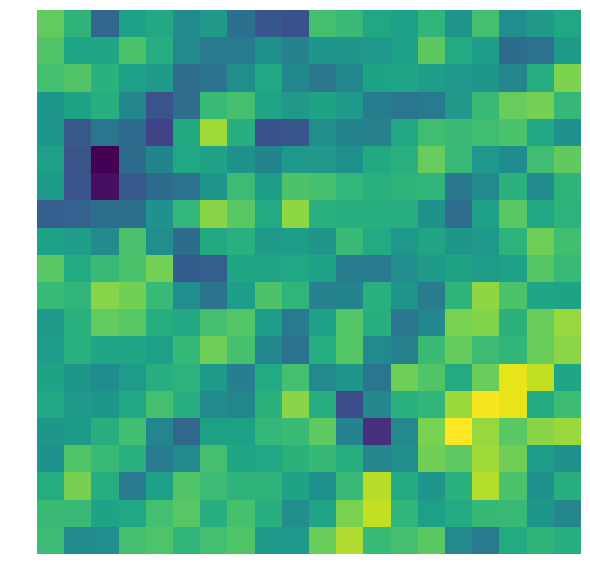

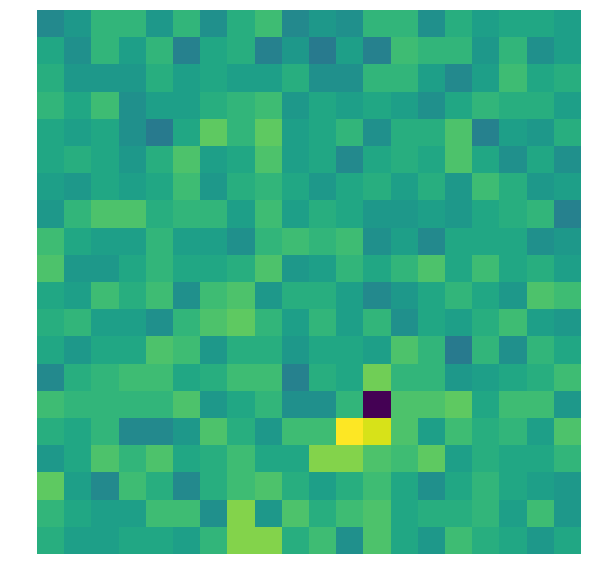

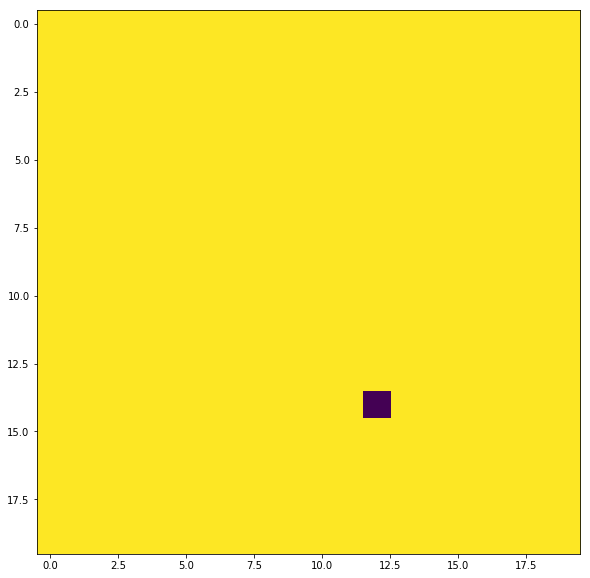

In [314]:
plt.imshow(lapas[91][60:80, 80:100])
plt.axis('off')
plt.show()
plt.axis('off')
plt.imshow(zapas[92][60:80, 80:100])
plt.show()
abbas = ~((zapas[92]>120)&(zapas[92]<141))
plt.imshow(abbas[60:80, 80:100])
plt.show()

In [309]:
np.bincount(abbas[60:80, 80:100].reshape(-1))

array([  1, 399])

In [310]:
(4**3)/(2.9**3)

2.624133830825372

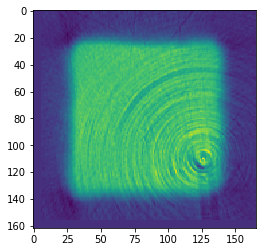

In [25]:
plt.imshow(low_transformed[10])

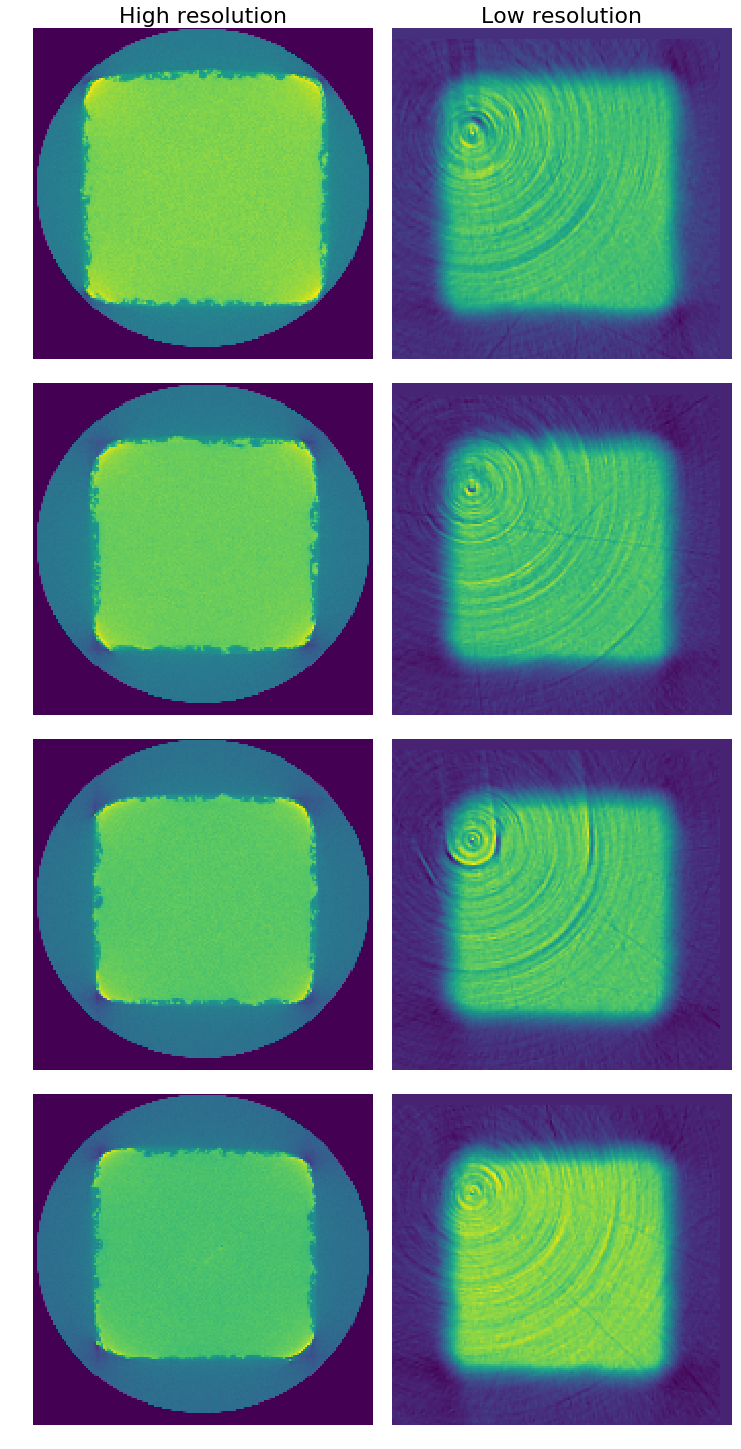

In [144]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20
indices = [10, 30, 60, 92]
for i, index in enumerate(indices, 1):
    ax = plt.subplot(int('42%d'%(2*i-1)))
    ax.axis('off')
    ax.imshow(high_transformed[index])
    if i == 1:
        ax.set_title('High resolution', size=22)
    ax = plt.subplot(int('42%d'%(2*i)))
    ax.axis('off')
    ax.imshow(low_transformed[index, ::-1, ::-1])
    if i == 1:
        ax.set_title('Low resolution', size=22)
plt.tight_layout(pad=.1, w_pad=.1, h_pad=.1)
plt.savefig('images/low_high_original_comparison.png', dpi=150)

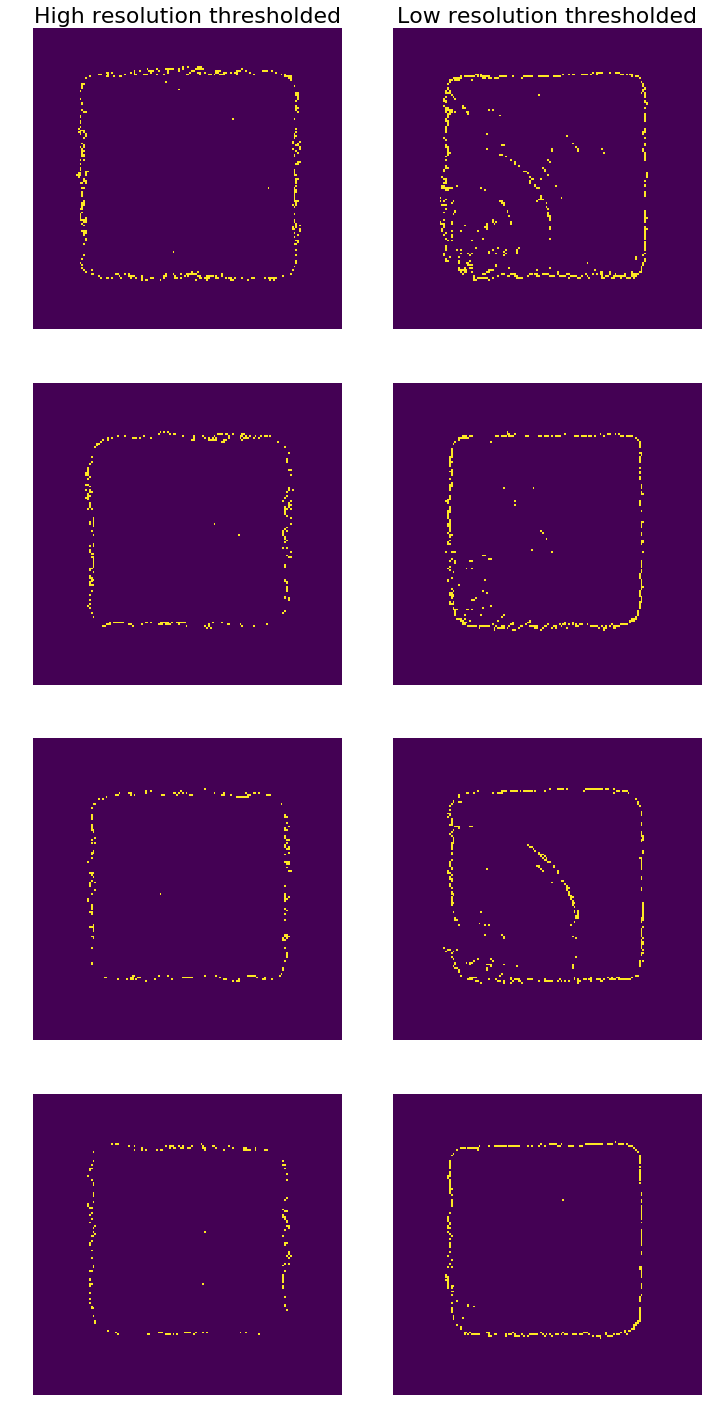

In [146]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20
indices = [10, 30, 60, 92]
filter_high = lambda zapas: (zapas>120)&(zapas<141)
filter_low  = lambda tapas: (tapas < 161) & (tapas > 158)
for i, index in enumerate(indices, 1):
    ax = plt.subplot(int('42%d'%(2*i-1)))
    ax.axis('off')
    ax.imshow(filter_high(high_transformed[index]))
    if i == 1:
        ax.set_title('High resolution thresholded', size=22)   
    ax = plt.subplot(int('42%d'%(2*i)))
    ax.axis('off')
    ax.imshow(filter_low(tapas[index+1])[::1, ::-1])
    if i == 1:
        ax.set_title('Low resolution thresholded', size=22)   
plt.tight_layout(pad=.1, w_pad=.1, h_pad=.1)
#plt.savefig('images/low_high_threshold_comparison.png', dpi=150)

In [47]:
tapas= (normalize(low_transformed)*255).astype('uint8')

In [58]:
xx = np.bincount(tapas[30].reshape(-1))
for i in np.where(xx)[0]:
    print(i, xx[i])

131 1
132 3
133 55
134 336
135 1093
136 4296
137 2910
138 2325
139 1226
140 588
141 425
142 317
143 221
144 238
145 203
146 200
147 168
148 184
149 177
150 166
151 160
152 153
153 142
154 165
155 151
156 143
157 153
158 161
159 176
160 190
161 247
162 357
163 626
164 1037
165 1709
166 2186
167 1826
168 1093
169 596
170 245
171 115
172 64
173 30
174 16
175 9
176 7
177 1
180 1
181 1


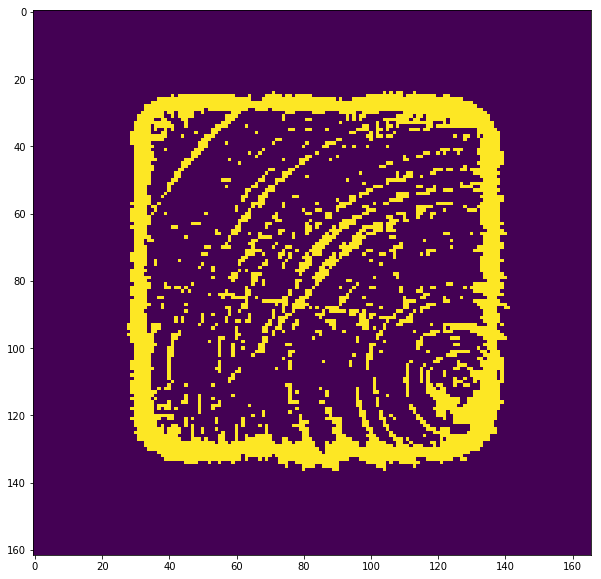

In [145]:
i = 30
plt.imshow((tapas[i] < 165) & (tapas[i] > 150))
#plt.hist(tapas[30].reshape(-1))

In [88]:
import utility

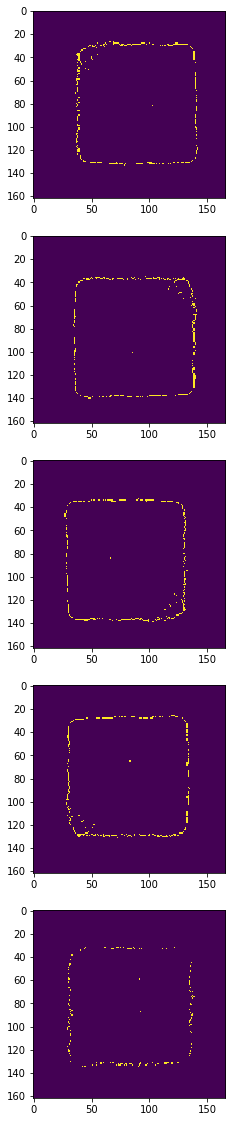

In [128]:
index = 92

for i in range(1, 5):
    ax = plt.subplot(int('51%d'%i))
    ax.imshow(filter_low(rotate_image(tapas[index], i*90))[:, ::-1])
ax = plt.subplot(515)
ax.imshow(filter_high(high_transformed[index])[::-1, ::1])